In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel (r'/Users/teemup123/Documents/Equation to solve.xlsx')
df = np.array(df)

Text(0, 0.5, 'price')

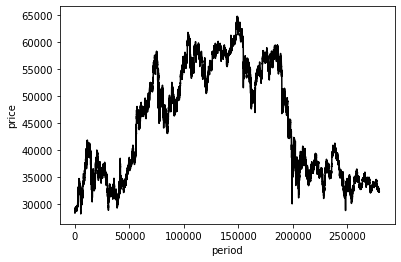

In [2]:
plt.plot(df[:,0],df[:,1],color = 'black', label ='stock price' )
plt.xlabel('period')
plt.ylabel('price')

In [3]:
#DUMMY CODE 
#P0: Reference price, P1: first evaluating point, PN: Nth point after P1 
#Position Establishment [when movement?]
    # LNG = SHT = 0.5 
    # If (P1 - P0)/P0 >= LNG/100 : LONG 
    # If (P0 - p1)/P0 >= SHT/100 : SHORT
#Cut loss condition [tunable]
    # for n > 1, 
        # LONG: if Pn <= P0, cut loss
        # SHORT: if Pn >= P0, cut loss 
#Take profit condition 
    # for n > 1, 
        #LONG: if (Pn - P1)/P1 >= 1/100 
        #SHORT: if (P1 - Pn)/P1 >= 1/100 
PA = df[:,1]

In [5]:
from IPython.display import clear_output

In [10]:
from IPython.display import clear_output

#Parameters 
#Take profit
LNG = SHT = 0.5/100 #When to establish position
PRT_LNG = 1/100 #Take long profit parameter 1% 
PRT_SHT = 1/100 #Take short profit parameter 1% 
#Stop loss 
#When price reaches P0 

Accum_profit = 0
Accum_loss = 0
Stake = 1E6
Fund = np.array([1E6])

for i in range(len(df)-1): 
    
    clear_output(wait = True)
    
    P0 = PA[i]
    P1 = PA[i+1]
    
    if (P1 - P0)/P0 >= LNG: #Long Position Condition 
        
        for j in range(len(df[i:,:])-1): #iterating from P1 to P_end 
           
            Pn = df[i+1+j, 1]
            
            if (Pn - P1)/P1 >= PRT_LNG: #Take profit condition
                
                profit = Stake*(Pn-P1)/P1
                Accum_profit = Accum_profit + profit 
                Fund = np.append(Fund, Fund[-1]+profit)
                break
                
            elif Pn <= P0: #Stoploss condition 
                
                loss = Stake*(Pn-P1)/P1
                Accum_loss = Accum_loss + loss
                Fund = np.append(Fund, Fund[-1]+loss)
                
                break
        
    elif (P0 - P1)/P0 >= SHT: #Short Position Condition 
        
        for j in range(len(df[i:,:])-1):
            Pn = df[i+1+j, 1]
            
            if (P1 - Pn)/P1 >= PRT_SHT: #Take profit condition
                
                profit = Stake*(Pn-P1)/P1
                Accum_profit = Accum_profit + profit 
                Fund = np.append(Fund, Fund[-1]+profit)
                
                break
                
            elif Pn <= P0: #Stoploss condition 
                
                loss = Stake*(Pn-P1)/P1
                Accum_loss = Accum_loss + loss
                Fund = np.append(Fund, Fund[-1]+loss)
                
                break
    
    print('Current Progress', np.round(100*i/(len(df)-1), 2),"%")
    

Current Progress 100.0 %


In [11]:
X = range(len(Fund))

Text(0, 0.5, 'Portfolio Value')

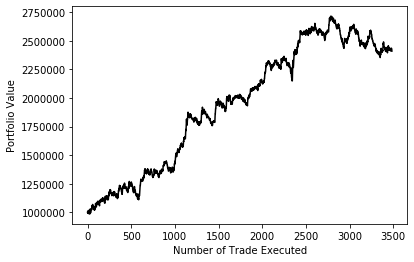

In [16]:
plt.plot(X, Fund,'k', label ='stock price' )
plt.xlabel('Number of Trade Executed')
plt.ylabel('Portfolio Value')



In [18]:
Fund[-1]/Fund[0]

2.4100110577849825

In [26]:
np.where(Fund==max(Fund))

(array([2782]),)

In [152]:
print(np.where(df[:,1] == Pn))

(array([276307]),)


In [149]:
len(df)

279291